## **Part 2 Predictive Modeling**
Oftentimes it is important to estimate a driver's future performance when calculating supply allocation requirements.

Based on the one week’s worth of data provided, can you design a model that predicts a driver's end of month completed trips? The completed trip dataset can be used as labels for supervised models.

Do not fret too much about model accuracy; we are more interested in the relevancy of the features you engineer for the model.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
## Data Analysis Phase
## MAin aim is to understand more about the data

# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from plotnine import *
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/pathao_assignment/Driver_Profilling_Dataset.csv')

#print the dataset shape with rows and columns
print(dataset.shape)

(3538, 9)


In [ ]:
#print the top-5 records
dataset.head()

,Driver_ID,total_assigned_requests,total_completed_trips,Assignment_to_completion_ratio,Average_Ride_Distance,Average_Rating,Average_Undiscounted_Fare,Average_Ride_Duration,Total_Trip
0,4922405,228,43,0.19,4880,4,115,983,176
1,5332197,176,30,0.17,4867,4,111,1029,80
2,5303157,293,39,0.13,4237,4,102,907,153
3,3355215,147,25,0.17,4375,4,104,915,119
4,5265495,116,26,0.22,4472,4,105,925,104


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3538 entries, 0 to 3537
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Driver_ID                       3538 non-null   int64  
 1   total_assigned_requests         3538 non-null   int64  
 2   total_completed_trips           3538 non-null   int64  
 3   Assignment_to_completion_ratio  3538 non-null   float64
 4   Average_Ride_Distance           3538 non-null   int64  
 5   Average_Rating                  3538 non-null   int64  
 6   Average_Undiscounted_Fare       3538 non-null   int64  
 7   Average_Ride_Duration           3538 non-null   int64  
 8   Total_Trip                      3538 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 248.9 KB


In [ ]:
dataset.describe()

,Driver_ID,total_assigned_requests,total_completed_trips,Assignment_to_completion_ratio,Average_Ride_Distance,Average_Rating,Average_Undiscounted_Fare,Average_Ride_Duration,Total_Trip
count,3.538000e+03,3538.000000,3538.000000,3538.000000,3538.000000,3538.0,3538.000000,3538.000000,3538.000000
mean,4.778928e+06,67.427643,16.710288,0.451518,4452.806388,4.0,100.336631,977.346806,74.819389
std,6.324610e+05,76.450612,19.890285,1.355453,16.223178,0.0,0.624645,29.751461,82.545603
min,2.869108e+06,1.000000,0.000000,0.000000,4237.000000,4.0,100.000000,878.000000,1.000000
25%,4.463529e+06,11.000000,2.000000,0.110000,4452.000000,4.0,100.000000,961.000000,14.000000
50%,5.006205e+06,42.000000,9.000000,0.250000,4455.000000,4.0,100.000000,962.000000,45.000000
75%,5.286508e+06,98.000000,25.000000,0.430000,4456.000000,4.0,101.000000,1024.000000,109.000000
max,5.441700e+06,669.000000,155.000000,32.000000,4880.000000,4.0,115.000000,1029.000000,620.000000


## **Feature Scaling**

In [ ]:
feature_scale=[feature for feature in dataset.columns if feature not in ['Total_Trip']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaler.transform(dataset[feature_scale])

array([[0.79814327, 0.33982036, 0.27741935, ..., 0.        , 1.        ,
        0.69536424],
       [0.95743476, 0.26197605, 0.19354839, ..., 0.        , 0.73333333,
        1.        ],
       [0.94614653, 0.43712575, 0.2516129 , ..., 0.        , 0.13333333,
        0.19205298],
       ...,
       [0.39541326, 0.        , 0.        , ..., 0.        , 0.06666667,
        0.97350993],
       [0.48064987, 0.        , 0.        , ..., 0.        , 0.06666667,
        0.97350993],
       [0.94688275, 0.        , 0.        , ..., 0.        , 0.06666667,
        0.97350993]])

In [ ]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([dataset[['Total_Trip']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [ ]:
data.head()


,Total_Trip,Driver_ID,total_assigned_requests,total_completed_trips,Assignment_to_completion_ratio,Average_Ride_Distance,Average_Rating,Average_Undiscounted_Fare,Average_Ride_Duration
0,176,0.798143,0.339820,0.277419,0.005938,1.000000,0.0,1.000000,0.695364
1,80,0.957435,0.261976,0.193548,0.005313,0.979782,0.0,0.733333,1.000000
2,153,0.946147,0.437126,0.251613,0.004063,0.000000,0.0,0.133333,0.192053
3,119,0.188956,0.218563,0.161290,0.005313,0.214619,0.0,0.266667,0.245033
4,104,0.931507,0.172156,0.167742,0.006875,0.365474,0.0,0.333333,0.311258


In [ ]:

data.to_csv('/content/drive/My Drive/pathao_assignment/Final_Dataset.csv',index=False)

In [ ]:
# X=data.drop(['Total_Trip'],axis=1)
# Y=data['Total_Trip']

In [ ]:
from sklearn.model_selection import train_test_split
df_train,df_test =train_test_split(data,test_size=0.20,random_state=7,shuffle=True)

In [ ]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]

# Return to train/test sets
train = data[:ntrain]
test = data[ntrain:]

In [ ]:
# Set up feature and target variables in train set, and remove Passenger ID from test set
X_test = test
X_train = train

# Scaling data to support modelling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_train = df_train['Total_Trip'].values
y_test = df_test['Total_Trip'].values


In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LassoCV 
from sklearn.linear_model import ElasticNetCV 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBRegressor

# Model fine-tuning and evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV,learning_curve, cross_val_score, KFold

In [ ]:
kfold = KFold(n_splits=20, random_state= 0, shuffle = True)

In [ ]:
def rmsle_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kfold))
    return(rmse)

In [ ]:
# Initiate 11 classifier models
LR = LinearRegression() 
ran = RandomForestRegressor(random_state=1)
xgb = XGBRegressor()


# Prepare lists
models = [LR, ran, xgb]         
scores = []

# Sequentially fit and cross validate all models
from keras import backend as K
for mod in models:
    mod.fit(X_train, y_train)
    scores.append(rmsle_cv(mod).mean())

[10:23:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:23:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:23:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:23:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:23:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:23:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:23:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:23:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
# Creating a table of results, ranked highest to lowest
results = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest Regressor', 'XGB Regressor'],
    'Score': scores})

result_df = results.sort_values(by='Score', ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,Score
0,Random Forest Regressor,85.388306
1,XGB Regressor,84.083857
2,Linear Regression,82.874187


Here Linear-Redressor shows less root mean squared error(rmse) than Random Forest Regressor and XGB Regressor model where Random Forest Regressor have the highest root mean squared error(rmse). which means Linear-Redressor works way better than Random Forest Regressor and others.

Text(0, 0.5, 'Algorithm')

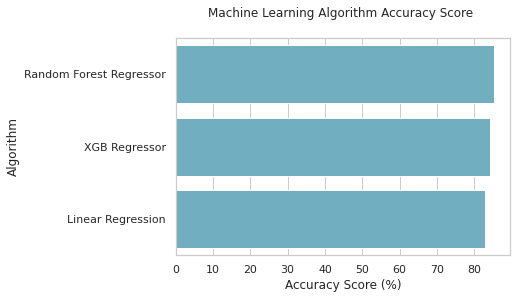

In [ ]:
# Plot results
sns.barplot(x='Score', y = 'Model', data = result_df, color = 'c')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

Now, we want to now see how heavily each feature was leaned in the modelling process. Let's look at what feature XGBoost found most useful when achieved the top score in round one. To help present this data i'm going to construct my own gragh - code below.

In [ ]:
# Function for new graph
def importance_plotting(data, x, y, palette, title):
    sns.set(style="whitegrid")
    ft = sns.PairGrid(data, y_vars=y, x_vars=x, size=5, aspect=1.5)
    ft.map(sns.stripplot, orient='h', palette=palette, edgecolor="black", size=15)
    
    for ax, title in zip(ft.axes.flat, titles):
    # Set a different title for each axes
        ax.set(title=title)
    # Make the grid horizontal instead of vertical
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)
    plt.show()

In [ ]:

# Building feature importance into a DataFrame
fi = {'Features':train.columns.tolist(), 'Importance':xgb.feature_importances_}
importance = pd.DataFrame(fi, index=None).sort_values('Importance', ascending=False)

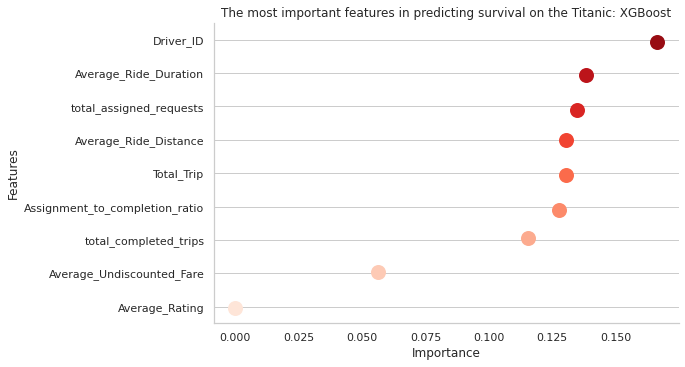

In [ ]:
# Creating graph title
titles = ['The most important features in predicting survival on the Titanic: XGBoost']

# Plotting graph
importance_plotting(importance, 'Importance', 'Features', 'Reds_r', titles)

### **Feature selection**

In [ ]:
# Getting feature importances for the models where we can

xgb_imp = pd.DataFrame({'Feature':train.columns, 'xgb importance':xgb.feature_importances_})
ran_imp = pd.DataFrame({'Feature':train.columns, 'ran importance':ran.feature_importances_})

# Merging results into a single dataframe
importances = xgb_imp.merge(ran_imp, on='Feature')

# Calculating average importance per feature
importances['Average'] = importances.mean(axis=1)

# Ranking top to bottom
importances = importances.sort_values(by='Average', ascending=False).reset_index(drop=True)

# Display
importances

,Feature,xgb importance,ran importance,Average
0,Driver_ID,0.166460,0.226259,0.196360
1,Total_Trip,0.130344,0.176105,0.153225
2,total_assigned_requests,0.134764,0.167112,0.150938
3,Assignment_to_completion_ratio,0.127687,0.130064,0.128876
4,Average_Ride_Distance,0.130555,0.109448,0.120002
5,total_completed_trips,0.115584,0.104602,0.110093
6,Average_Ride_Duration,0.138452,0.070956,0.104704
7,Average_Undiscounted_Fare,0.056154,0.015454,0.035804
8,Average_Rating,0.000000,0.000000,0.000000


In [ ]:
# Building feature importance into a DataFrame
fi = {'Features':importances['Feature'], 'Importance':importances['Average']}
importance = pd.DataFrame(fi, index=None).sort_values('Importance', ascending=False)

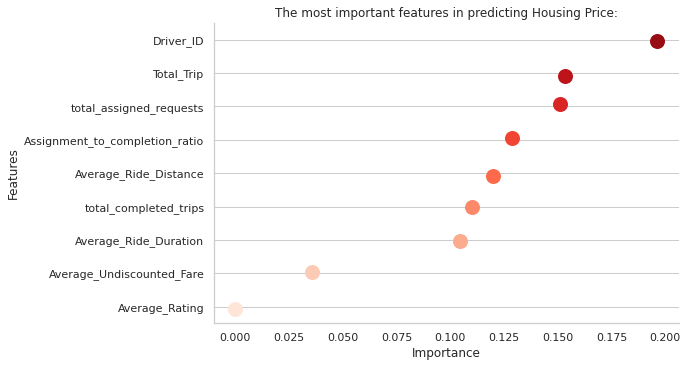

In [ ]:
# Creating graph title
titles = ['The most important features in predicting Housing Price:']

# Plotting graph
importance_plotting(importance, 'Importance', 'Features', 'Reds_r', titles)

It looks clear now that Average_Rating, Average_Undiscounted_Fare really aren't helping us out, and therefore I am going to get rid of them.

In [ ]:
# Drop redundant features
X_train = train.drop(['Average_Rating','Average_Undiscounted_Fare'], axis=1)
X_test = test.drop(['Average_Rating', 'Average_Undiscounted_Fare'], axis=1)

# Re-build model variables
X_train = train
X_test = test

# Transform
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Model re-training**

In [ ]:
# Initiate 11 classifier models
LR = LinearRegression() 
ran = RandomForestRegressor(random_state=1)
xgb = XGBRegressor()


# Prepare lists
models = [LR, ran, xgb]         
scores_2 = []

# Sequentially fit and cross validate all models
from keras import backend as K
for mod in models:
    mod.fit(X_train, y_train)
    scores_2.append(rmsle_cv(mod).mean())

[10:31:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:31:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:31:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:31:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:31:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:31:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:31:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:31:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
# Creating a table of results, ranked highest to lowest
results = pd.DataFrame({
    'Model':['Linear Regression','RandomForest Regressor', 'XGBRegressor'],
    'Original Score': scores,
    'Score with feature selection': scores_2})

result_df = results.sort_values(by='Score with feature selection', ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,Original Score,Score with feature selection
0,RandomForest Regressor,85.388306,85.388306
1,XGBRegressor,84.083857,84.083857
2,Linear Regression,82.874187,82.874187


Text(0, 0.5, 'Algorithm')

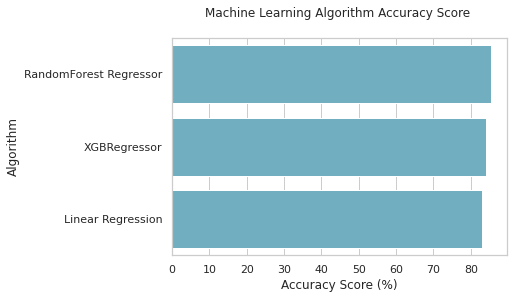

In [ ]:
# Plot results
sns.barplot(x='Score with feature selection', y = 'Model', data = result_df, color = 'c')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

### **Model (hyper-parameter) tuning**

### **Random Forest**

In [ ]:
ran_param_grid = {"max_depth": [3,None],
              "max_features": [1, 3, 5, 7],
              "min_samples_leaf": [2, 4, 6, 8, 10],
              "n_estimators" :[10, 25, 50, 75, 100]
                }

grid_ran = GridSearchCV(ran,param_grid = ran_param_grid, cv = kfold, scoring = "neg_mean_squared_error", n_jobs = -1, verbose = 1)
grid_ran.fit(X_train,y_train)
RFC_best = grid_ran.best_estimator_
print(grid_ran.best_params_)

Fitting 20 folds for each of 200 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 696 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 1184 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1884 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2684 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 3326 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 3976 tasks      | elapsed: 11.1min


{'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 10, 'n_estimators': 25}


[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed: 11.4min finished


In [ ]:
y_submission_1 = np.expm1(gsRFC.predict(X_test))

In [ ]:
print("Random Forest mean score:", rmsle_cv(RFC_best).mean())

Random Forest mean score: 82.68011309563366


### **XG Boost**

In [ ]:
XGB = XGBRegressor()
learning_rate = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
n_estimators = [10, 25, 50, 75, 100, 250, 500, 750, 1000]

# Setting up parameter grid
hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

                
gsXGB = GridSearchCV(XGB,param_grid = hyperparams, cv=kfold, scoring="neg_mean_squared_error", n_jobs= -1, verbose = 1)
gsXGB.fit(X_train,y_train)
XGB_best = gsXGB.best_estimator_
print(gsXGB.best_params_)

Fitting 20 folds for each of 72 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 712 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1260 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.9min finished


[10:58:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'learning_rate': 0.005, 'n_estimators': 750}


In [ ]:
y_submission_2 = np.expm1(gsXGB.predict(X_test))

In [ ]:
print("XG Boost mean score:", rmsle_cv(XGB_best).mean())

[11:00:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:00:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:00:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:00:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:00:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:00:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:00:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:00:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

### **Model re-training**

In [ ]:
# Initiate tuned models

ran = RandomForestRegressor(n_estimators=25,
                             max_depth=3, 
                             max_features=1,
                             min_samples_leaf=10, 
                             min_samples_split=6,  
                             random_state=1)


xgb = XGBRegressor(learning_rate=0.005, 
                    n_estimators=750,
                    random_state=1)


Lr=LinearRegression() 


# Prepare lists
models = [LR,ran, xgb]   

scores_3 = []

# Fit & cross-validate
for mod in models:
    mod.fit(X_train, y_train)
    scores_3.append(rmsle_cv(mod).mean())

[11:01:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:01:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:01:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:01:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:01:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:01:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:01:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:01:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
# Creating a table of results, ranked highest to lowest
results = pd.DataFrame({
    'Model': ['Linear Regression','RandomForest Regressor', 'XGBRegressor'],
    'Original Score': scores,
    'Score with feature selection': scores_2,
    'Score with tuned parameters': scores_3})

result_df = results.sort_values(by='Score with tuned parameters', ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,Original Score,Score with feature selection,Score with tuned parameters
0,XGBRegressor,84.083857,84.083857,83.127009
1,Linear Regression,82.874187,82.874187,82.874187
2,RandomForest Regressor,85.388306,85.388306,82.680113


Text(0, 0.5, 'Algorithm')

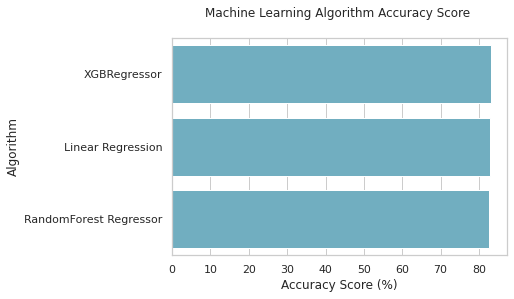

In [ ]:
# Plot results
sns.barplot(x='Score with tuned parameters', y = 'Model', data = result_df, color = 'c')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

As finally all three of the model shows approximatly same root mean square error(rmse) we select a single model and predict the output for the testing data.


In [ ]:
X_train.shape

(2830, 9)

In [ ]:
X_test.shape

(708, 9)

In [ ]:
predictions = ran.predict(X_test)  

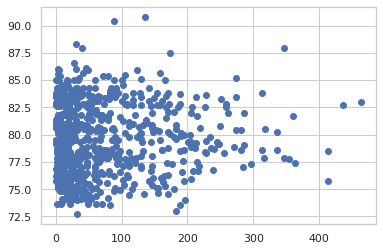

In [ ]:
plt.scatter(y_test,predictions)

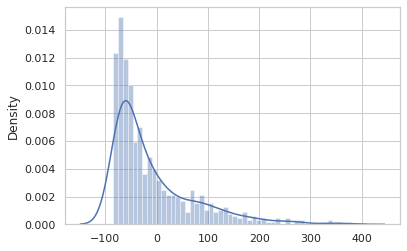

In [ ]:
sns.distplot((y_test-predictions),bins=50); 

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 63.85927970963674
MSE: 6482.053929029038
RMSE: 80.51120374847862


### **Thank You..!**